In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from IPython.display import display
def eval_symp(fxn,var,vals):
    """function to evaluate symbolic expressions with real numbers (numpy floats or integers)"""
    f = sp.lambdify(var,fxn,"numpy")
    return f(vals)
def make_symbols():
    unicharacters = ["\u03B1",
                        "\u03B2",
                        "\u03B3",
                        "\u03B4",
                        "\u03B5",
                        "\u03B6",
                        "\u03B7",
                        "\u03B8",
                        "\u03B9",
                        "\u03BA",
                        "\u03BB",
                        "\u03BC",
                        "\u03BD",
                        "\u03BE",
                        "\u03BF",
                        "\u03C0",
                        "\u03C1",
                        "\u03C2",
                        "\u03C3",
                        "\u03C4",
                        "\u03C5",
                        "\u03C6",
                        "\u03C7",
                        "\u03C8",
                        "\u03C9",
                        "\u00C5"]
    keys = "alpha,beta,gamma,delta,epsilon,zeta,eta,theta,iota,kappa,lambda,mu,nu,xi,omicron,pi,rho,final_sigma,sigma,tau,upsilon,phi,chi,psi,omega,angstrom"
    return dict(zip(keys.split(","),unicharacters))
symbols = make_symbols()

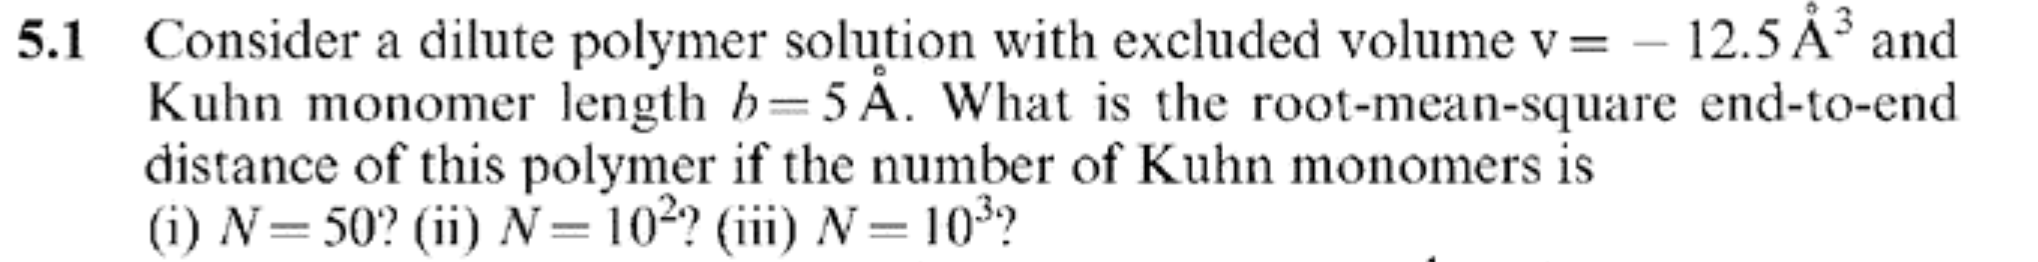

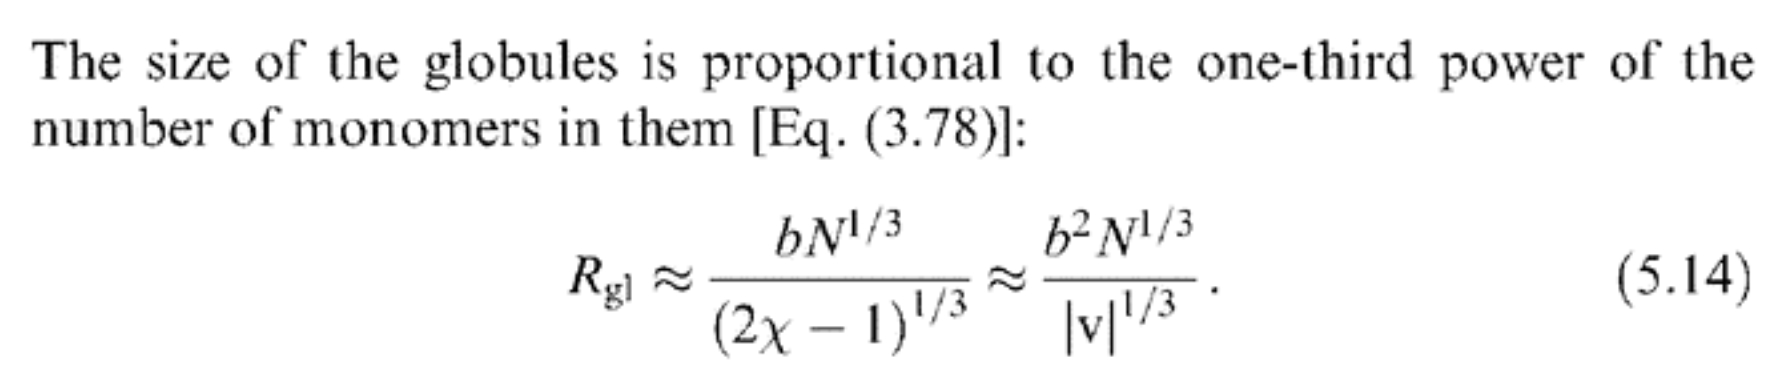

In [31]:
RMS = lambda v,N,b : np.power(v, -(1/3))*np.power(b, 2)*np.power(N, (1/3))
for N in [50,1e2,1e3]:
    print(f"Root Mean Square end-to-end for N = {int(N)} is : {RMS(12.5,N,5)} {symbols['angstrom']}")

Root Mean Square end-to-end for N = 50 is : 39.685026299204985 Å
Root Mean Square end-to-end for N = 100 is : 50.0 Å
Root Mean Square end-to-end for N = 1000 is : 107.72173450159417 Å


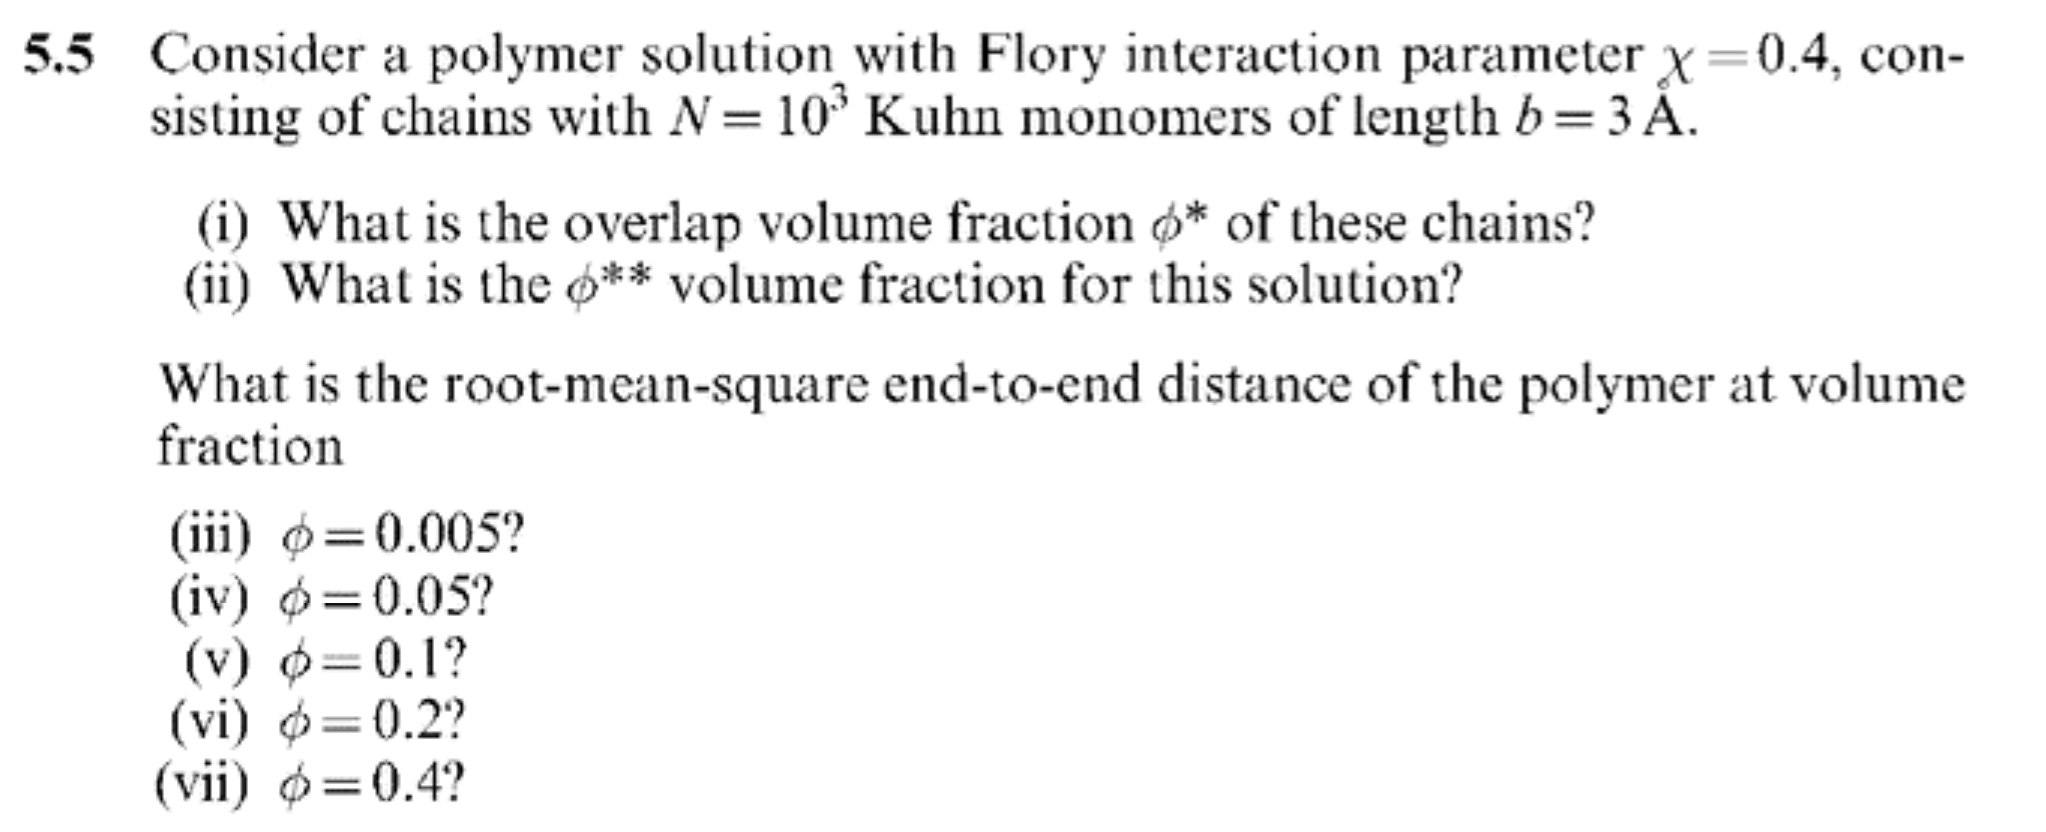

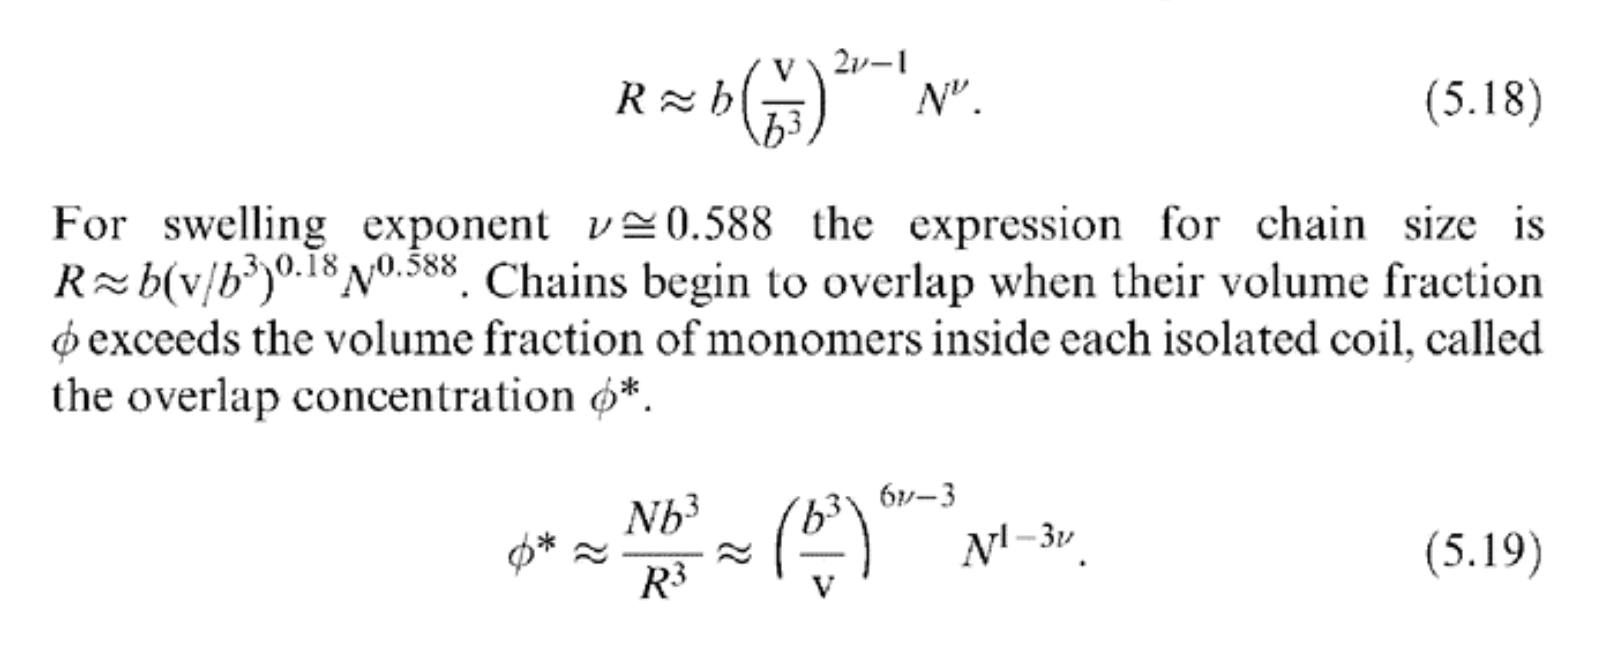

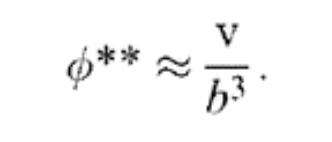

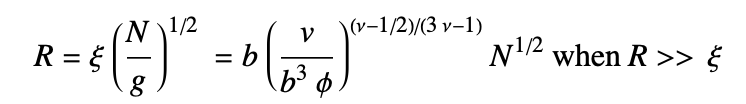

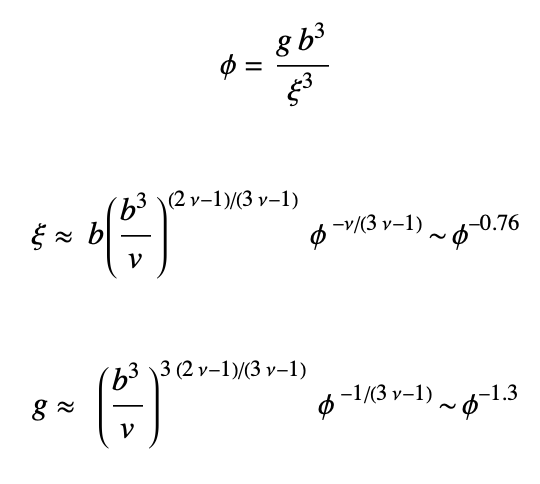

In [41]:
v = sp.Symbol(r"\nu")
vol = sp.Symbol("v")
R = sp.Symbol("R", positive = True)
R_phi = sp.Symbol(r"R(\phi)", positive = True)
N = sp.Symbol("N", positive = True)
b = sp.Symbol("b", postive = True)
phi = sp.Symbol(r"\phi", positive = True)
chi = sp.Symbol(r"\chi")
phi_star = sp.Symbol(r"\phi^{*}")
phi_star2 = sp.Symbol(r"\phi^{**}")
vals = {chi:0.4,v:0.588,N:1e3}

print("Here are the equations and substitutions to get everything in terms of known constants")
Req = sp.Pow(N,v)*b*sp.Pow(vol/sp.Pow(b,3),2*v-1)
R_phi_eq = b*sp.Pow(vol/((b**3)*phi),(v-.5)/(3*v-1))*sp.Pow(N,1/2)

display(sp.Eq(R,Req))
display(sp.Eq(R_phi, R_phi_eq))
voleq = sp.Pow(b,3)*(1-2*chi)
display(sp.Eq(vol, voleq))

Req_1 = Req.subs(vol,voleq)
R_phi_eq_1 = R_phi_eq.subs(vol, voleq)

display(sp.Eq(R,Req_1))
display(sp.Eq(R_phi, R_phi_eq_1))



phi_star_eq = sp.powsimp((N*sp.Pow(b,3))/sp.Pow(Req,3)).subs(vol,voleq)

display(sp.Eq(phi_star,phi_star_eq))
display(sp.Eq(phi_star,float(phi_star_eq.subs(vals))))

phi_star2_eq = vol/sp.Pow(b,3)
phi_star2_eq2 = phi_star2_eq.subs(vol,voleq)

display(sp.Eq(phi_star2,phi_star2_eq))
display(sp.Eq(phi_star2,phi_star2_eq2))
display(sp.Eq(phi_star2,phi_star2_eq2.subs(chi,0.4)))

##using conditional statements to determine the right eq. and exponent of N
print("Here are the conputed values for R, given the volume fraction")
for p in [0.005,0.05,0.1,0.2,0.4]:
    
    if p<.012:
       
        R_ = float(Req_1.subs({b:3,v:0.588,N:1e3, chi:0.4}))
    
    if 0.012<p<=0.2:
        
        R_ = float(R_phi_eq_1.subs({b:3,v:0.588,N:1e3,chi:0.4, phi:p}))
    
    if p>0.2:
        
        R_ = 3*np.sqrt(1e3)

    print(f"For {symbols['phi']} = {p}, R = {R_} {symbols['angstrom']}\n")

Here are the equations and substitutions to get everything in terms of known constants


Eq(R, N**\nu*b*(v/b**3)**(2*\nu - 1))

Eq(R(\phi), N**0.5*b*(v/(\phi*b**3))**((\nu - 0.5)/(3*\nu - 1)))

Eq(v, b**3*(1 - 2*\chi))

Eq(R, N**\nu*b*(1 - 2*\chi)**(2*\nu - 1))

Eq(R(\phi), N**0.5*b*((1 - 2*\chi)/\phi)**((\nu - 0.5)/(3*\nu - 1)))

Eq(\phi^{*}, N**(1 - 3*\nu)*(1 - 2*\chi)**(3 - 6*\nu))

Eq(\phi^{*}, 0.0119414251913986)

Eq(\phi^{**}, v/b**3)

Eq(\phi^{**}, 1 - 2*\chi)

Eq(\phi^{**}, 0.2)

Here are the conputed values for R, given the volume fraction
For φ = 0.005, R = 131.25097370135487 Å

For φ = 0.05, R = 111.29316131533514 Å

For φ = 0.1, R = 102.75308429779614 Å

For φ = 0.2, R = 94.86832980505136 Å

For φ = 0.4, R = 94.86832980505137 Å



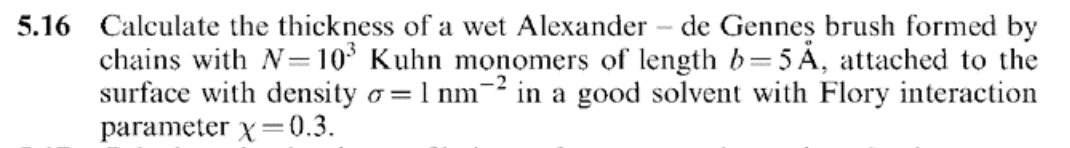

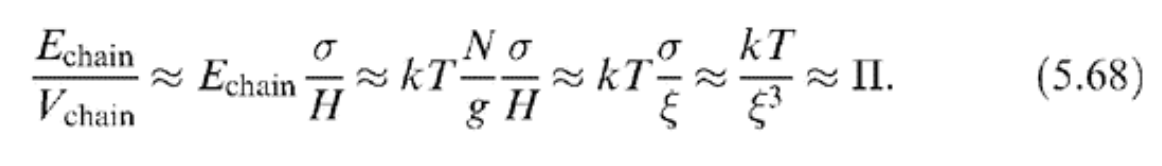

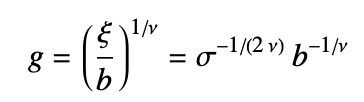

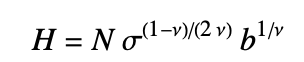

 # can't find a reason not to use the equation as given


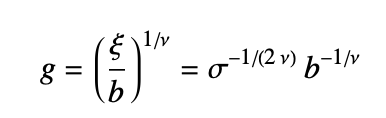

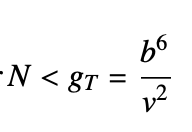

In [37]:
constants = {b:.5, sigma:1, v : 0.588, N : 1e3}

In [38]:
E = sp.Symbol("E")
H = sp.Symbol("H", positive = True)
xi = sp.Symbol(r"\xi")
sigma = sp.Symbol(r"\sigma", positive = True)
k = sp.Symbol("k", positve = True)
T = sp.Symbol("T", postive = True)
H = sp.Symbol("H")
g = sp.Symbol("g")
H_eq = N*sp.Pow(sigma,(1-v)/(2*v))*sp.Pow(b,1/v)
display(sp.Eq(H,H_eq))
print(f"The thickness of the brush is {H_eq.subs(constants)} nm")

Eq(H, N*\sigma**((1 - \nu)/(2*\nu))*b**(1/\nu))

The thickness of the brush is 307.641007567909 nm
